In [25]:
from glucose_dataset import GlucoseDataset
from rockpool.timeseries import TSContinuous, TSEvent
import torch
import matplotlib.pyplot as plt

ds = GlucoseDataset("datasets/diabetes_datasets.zip", sub_directory="Shanghai_T1DM")

sample_size: int = 16
dt = 1.0 # Seconds
num_dt_per_sample = round(ds.sample_interval / dt)
sample_data = ds.__getitem__(3)[20:][:sample_size*4]

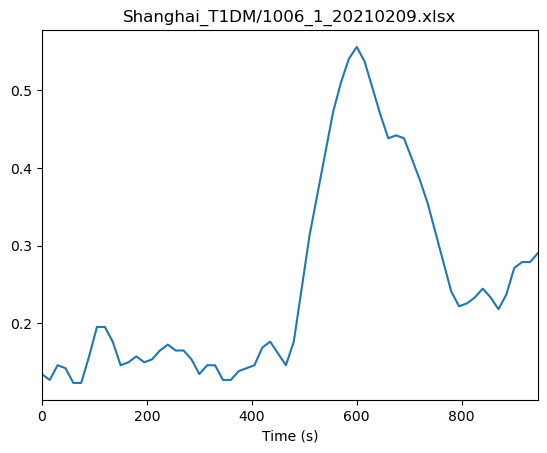

In [26]:
# Plot the time series
ts_continuous = TSContinuous.from_clocked(samples=sample_data, dt=ds.sample_interval, name=ds.file_list[file_index]) # type: ignore
ts_continuous.plot();

In [27]:
import snntorch.spikegen as spikegen

trials = 8
spikes = spikegen.rate(sample_data, num_steps=num_dt_per_sample*trials).reshape(sample_size * num_dt_per_sample, trials)
ts_events = TSEvent.from_raster(raster=spikes, dt=dt) # type: ignore
ts_events.plot();

RuntimeError: shape '[240, 8]' is invalid for input of size 7680